In [ ]:
!pip3 install tab2img
!pip3 install sklearn
!pip3 install pytorch-tabnet
from tab2img.converter import Tab2Img

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b79d6f82eed26d7ba3d98426343a1e40fd59ba4389ba17259060aeeb7472a17a
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 769 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AOS_Senior_Research/Android_APK_Data.csv')
dataset.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(29332, 86)


In [ ]:
print(y)
print(y.shape)

[0 0 0 ... 1 1 1]
(29332,)


In [ ]:
model = Tab2Img()
images = model.fit_transform(X, y)

In [ ]:
print(len(images))

29332


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)


(20532, 86)
(20532,)


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

clf = TabNetClassifier()
clf.fit(
  X_train, y_train,
  eval_set=[(X_test, y_test)]
)
preds = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68565 | val_0_auc: 0.81328 |  0:00:06s
epoch 1  | loss: 0.44604 | val_0_auc: 0.88092 |  0:00:07s
epoch 2  | loss: 0.27885 | val_0_auc: 0.95429 |  0:00:09s
epoch 3  | loss: 0.21164 | val_0_auc: 0.96567 |  0:00:11s
epoch 4  | loss: 0.19282 | val_0_auc: 0.96517 |  0:00:13s
epoch 5  | loss: 0.18025 | val_0_auc: 0.9692  |  0:00:14s
epoch 6  | loss: 0.16759 | val_0_auc: 0.97506 |  0:00:15s
epoch 7  | loss: 0.15853 | val_0_auc: 0.97708 |  0:00:16s
epoch 8  | loss: 0.15028 | val_0_auc: 0.97843 |  0:00:17s
epoch 9  | loss: 0.14712 | val_0_auc: 0.97961 |  0:00:18s
epoch 10 | loss: 0.14396 | val_0_auc: 0.98098 |  0:00:19s
epoch 11 | loss: 0.14094 | val_0_auc: 0.98209 |  0:00:20s
epoch 12 | loss: 0.13721 | val_0_auc: 0.98236 |  0:00:21s
epoch 13 | loss: 0.13808 | val_0_auc: 0.98376 |  0:00:22s
epoch 14 | loss: 0.13467 | val_0_auc: 0.98474 |  0:00:22s
epoch 15 | loss: 0.13184 | val_0_auc: 0.98565 |  0:00:23s
epoch 16 | loss: 0.12895 | val_0_auc: 0.98518 |  0:00:24s
epoch 17 | los

/usr/local/lib/python3.8/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
print(len(preds), preds)
print(len(y_test), y_test)

8800 [1 0 0 ... 1 0 1]
8800 [1 0 0 ... 1 0 1]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix

Text(0, 0.5, 'Loss')

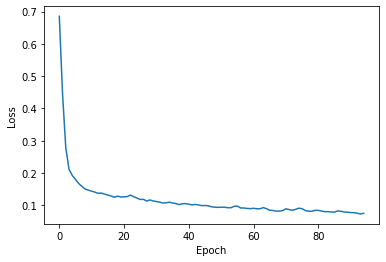

In [ ]:
plt.plot(clf.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'val_0_auc')

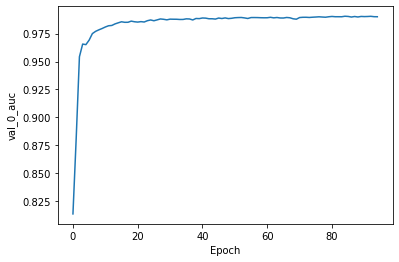

In [ ]:
plt.plot(clf.history['val_0_auc'])
plt.xlabel('Epoch')
plt.ylabel('val_0_auc')

Text(0, 0.5, 'Learning Rate')

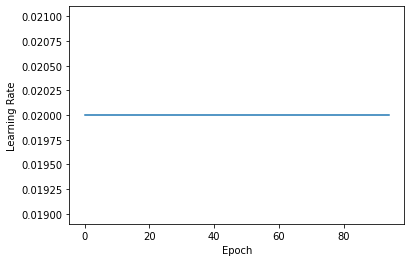

In [ ]:
plt.plot(clf.history['lr'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

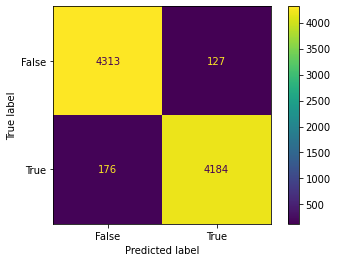

Accuracy: 0.9655681818181818
Precision: 0.9705404778473672
Sensitivity Recall: 0.9596330275229358
Specificity: 0.9713963963963964
F1 Score: 0.9650559335716757


In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, preds)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy:', Accuracy)

Precision = metrics.precision_score(y_test, preds)
print('Precision:', Precision)

Sensitivity_recall = metrics.recall_score(y_test, preds)
print('Sensitivity Recall:', Sensitivity_recall)

Specificity = metrics.recall_score(y_test, preds, pos_label=0)
print('Specificity:', Specificity)

F1_score = metrics.f1_score(y_test, preds)
print('F1 Score:', F1_score)

